The information of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   

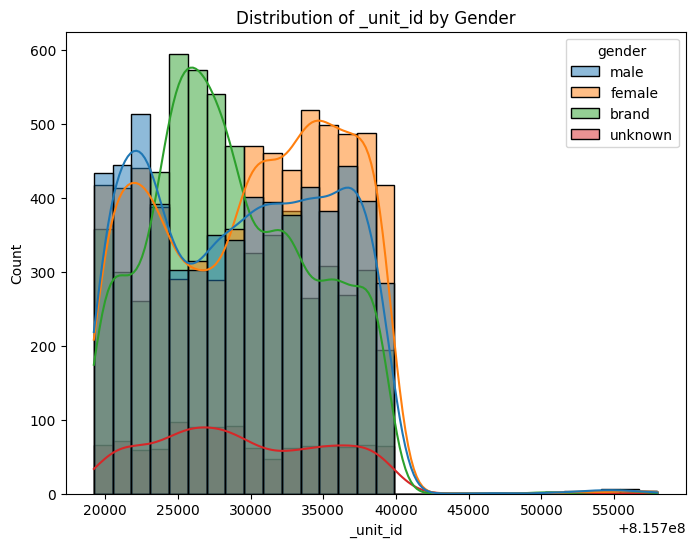

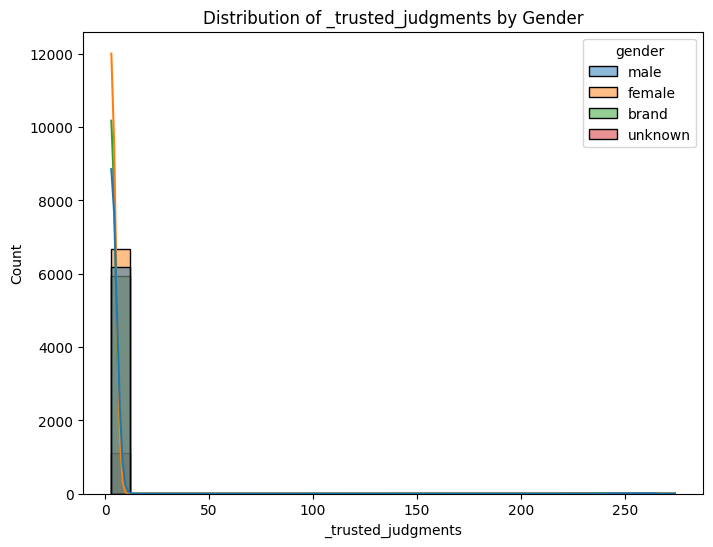

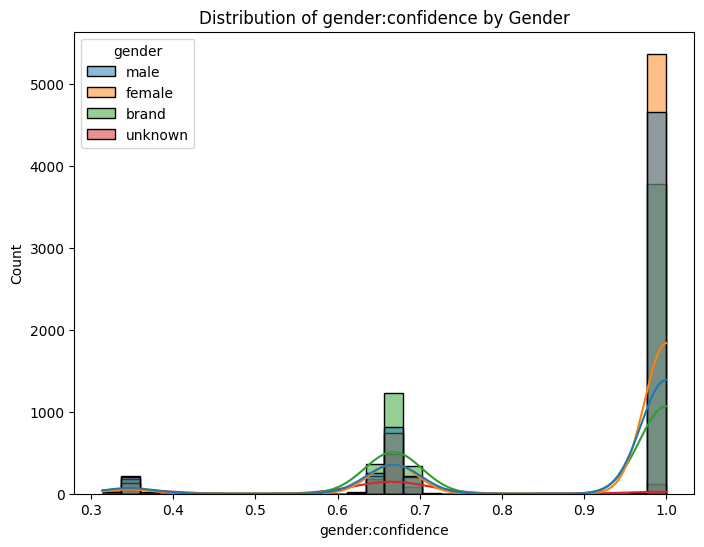

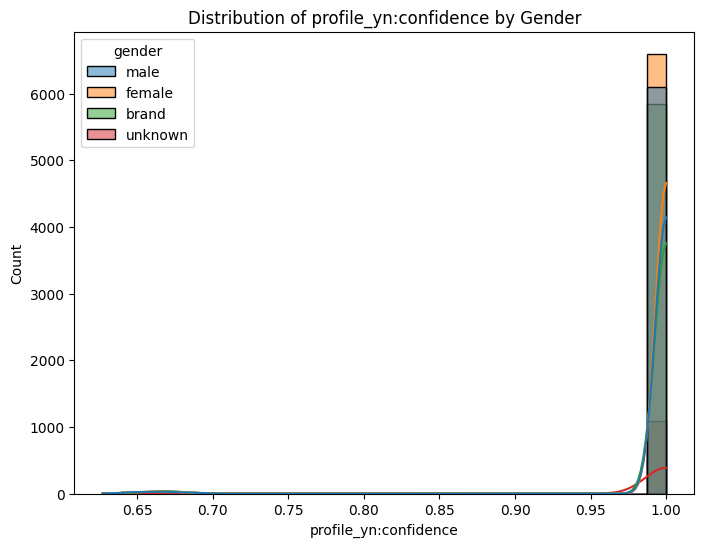

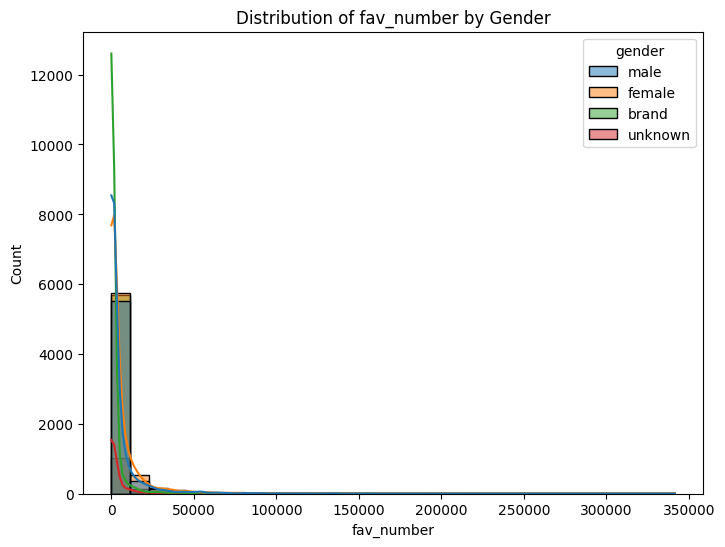

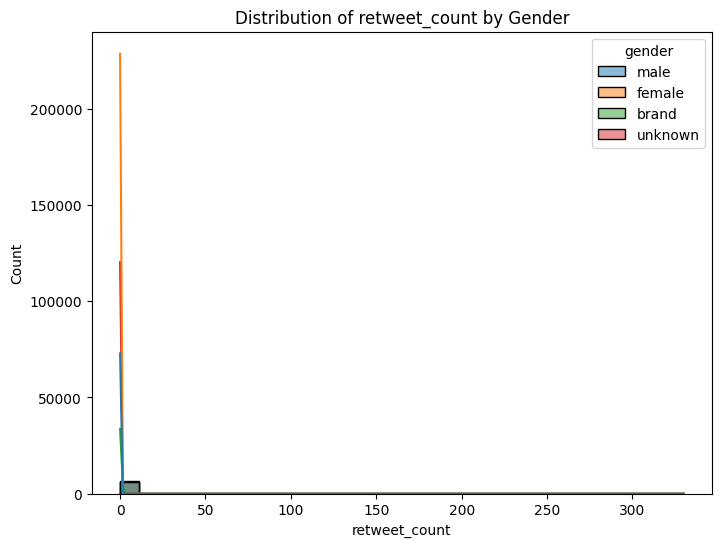

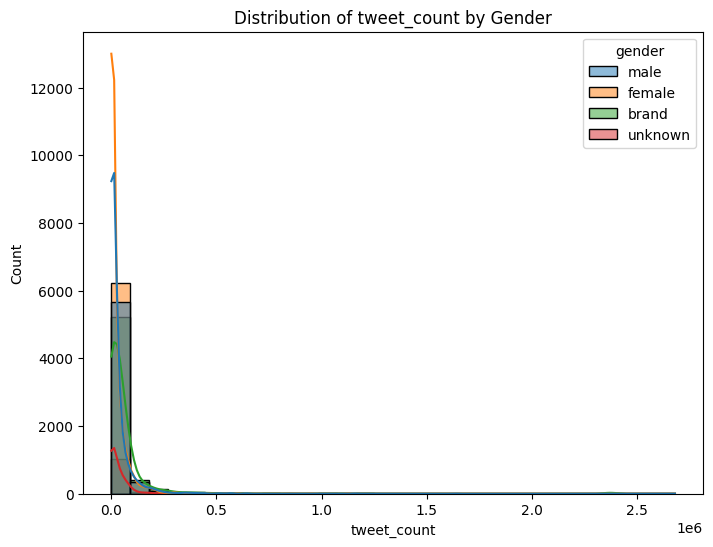

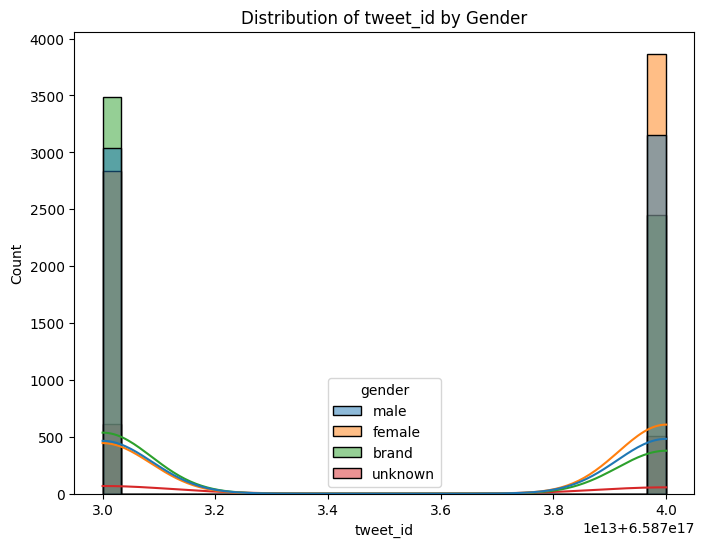

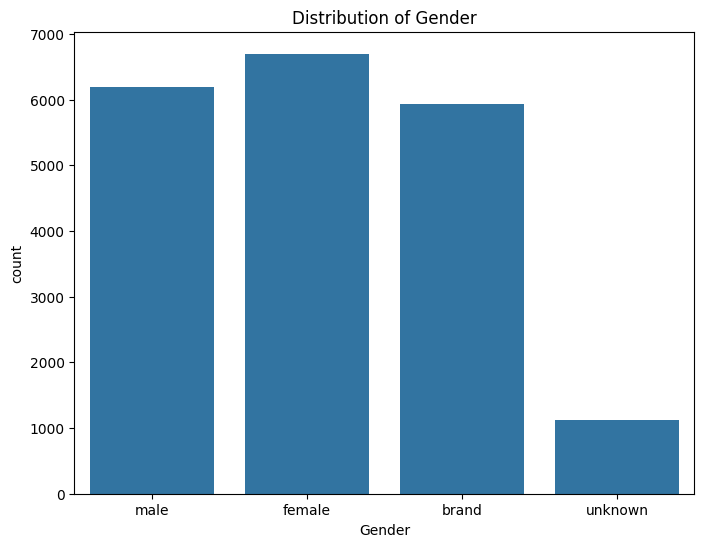

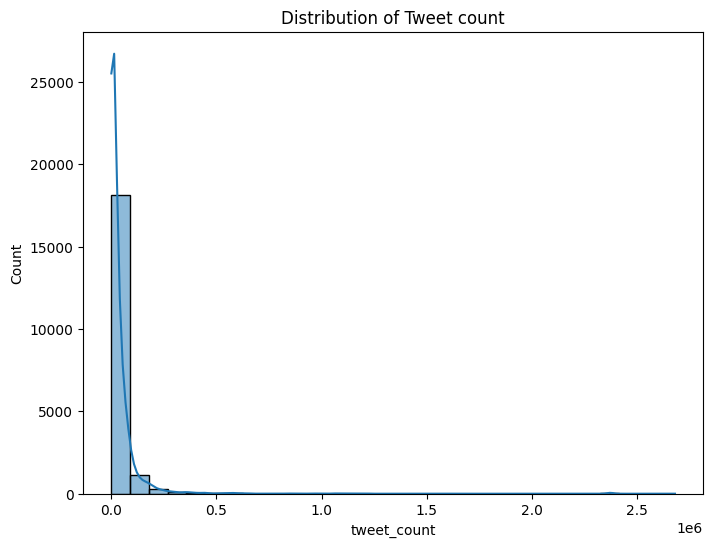

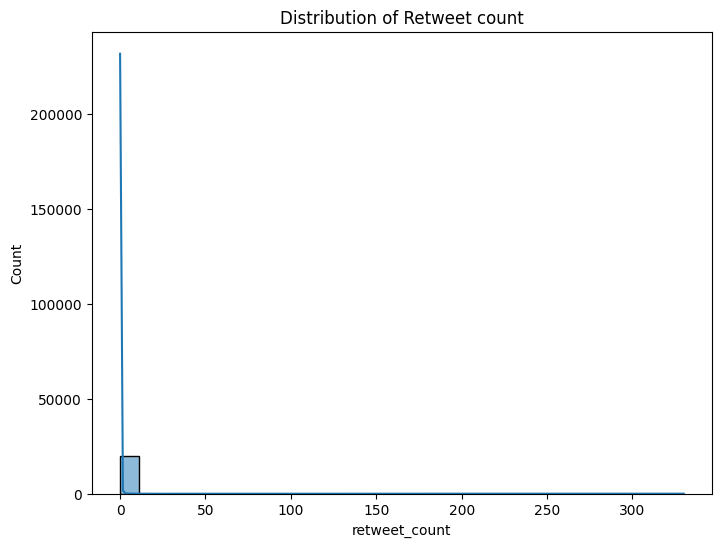

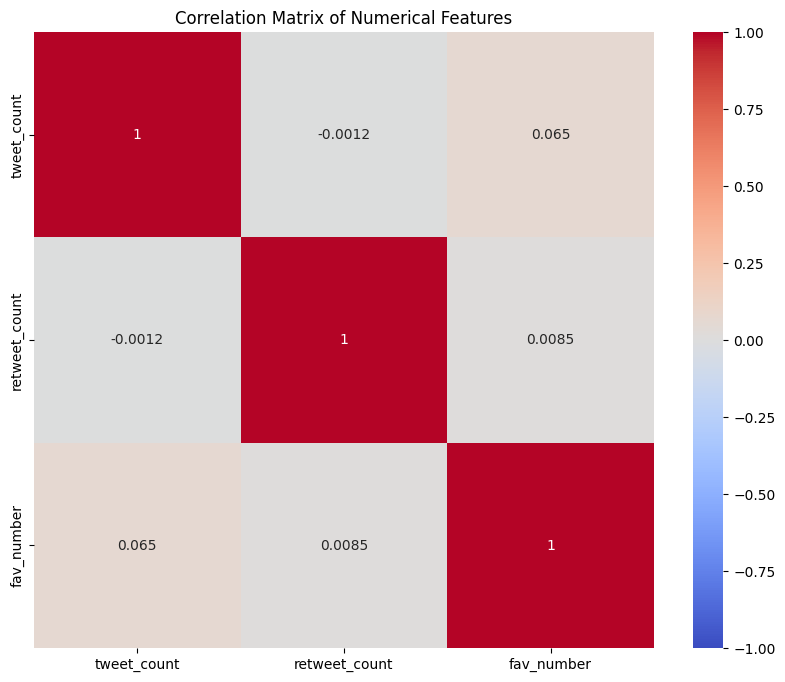

Number of NaN values in 'link_color': 0
Number of NaN values in 'sidebar_color': 0
the number of link color is 2986
the number of side bar color is 559
Number of NaN values in 'link_color': 0
Number of NaN values in 'sidebar_color': 0


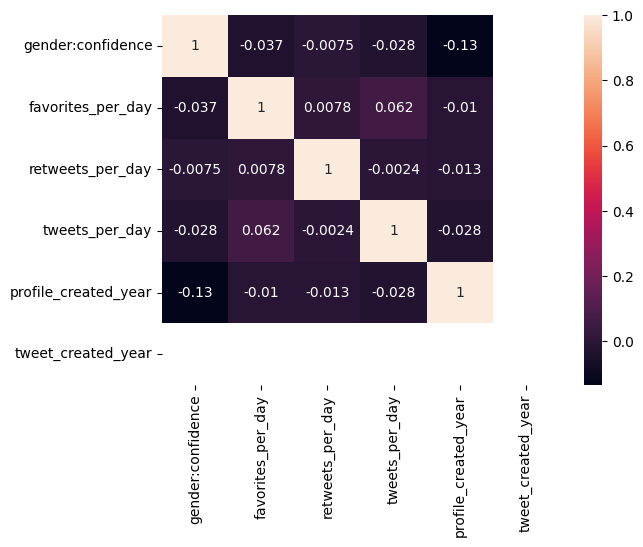

[0 1 2]
<class 'pandas.core.frame.DataFrame'>
Index: 18836 entries, 0 to 20049
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  18836 non-null  int64  
 1   gender:confidence       18836 non-null  float64
 2   description             15522 non-null  object 
 3   favorites_per_day       18836 non-null  float64
 4   link_color              18836 non-null  object 
 5   retweets_per_day        18836 non-null  float64
 6   sidebar_color           18836 non-null  object 
 7   text                    18836 non-null  object 
 8   tweets_per_day          18836 non-null  float64
 9   user_timezone           18836 non-null  object 
 10  tweet_location          18836 non-null  object 
 11  profile_created_year    18836 non-null  int32  
 12  tweet_created_year      18836 non-null  int32  
 13  tweet_location_encoded  18836 non-null  float64
 14  user_timezone_encoded   18836 non-n

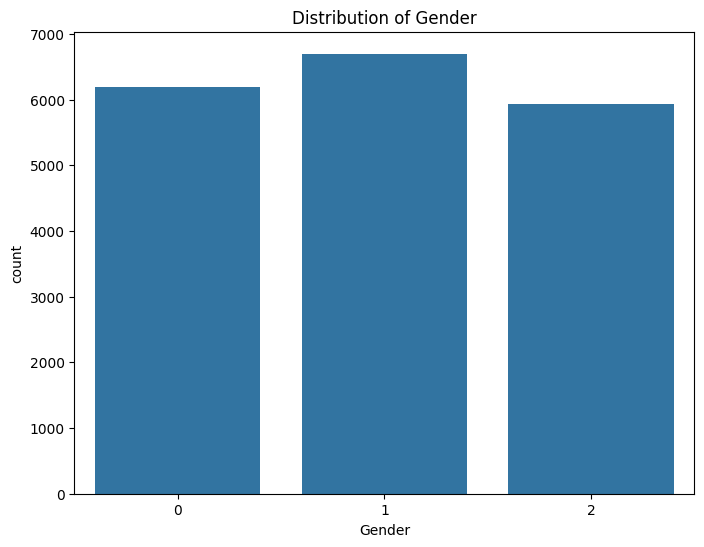

All features that will be used are ['gender', 'gender:confidence', 'description', 'favorites_per_day', 'retweets_per_day', 'text', 'tweets_per_day', 'profile_created_year', 'tweet_created_year', 'tweet_location_encoded', 'user_timezone_encoded']
After all, here is the information of the dataset
<class 'pandas.core.frame.DataFrame'>
Index: 18836 entries, 0 to 20049
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  18836 non-null  int64  
 1   gender:confidence       18836 non-null  float64
 2   description             15522 non-null  object 
 3   favorites_per_day       18836 non-null  float64
 4   retweets_per_day        18836 non-null  float64
 5   text                    18836 non-null  object 
 6   tweets_per_day          18836 non-null  float64
 7   profile_created_year    18836 non-null  int32  
 8   tweet_created_year      18836 non-null  int32  
 9   tweet_locati

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anasr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anasr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anasr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anasr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             description  \
0                                  i sing my own rhythm.   
1      I'm the author of novels filled with family dr...   
2                    louis whining and squealing and all   
3      Mobile guy.  49ers, Shazam, Google, Kleiner Pe...   
4      Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...   
...                                                  ...   
20045                                               (rp)   
20046  Whatever you like, it's not a problem at all. ...   
20047  #TeamBarcelona ..You look lost so you should f...   
20048  Anti-statist; I homeschool my kids. Aspiring t...   
20049                     Teamwork makes the dream work.   

                                                    text  
0      Robbie E Responds To Critics After Win Against...  
1      ÛÏIt felt like they were my friends and I was...  
2      i absolutely adore when louis starts the songs...  
3      Hi @JordanSpieth - Looking at the ur

In [1]:
# Import necessary libraries
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", package])
try:
    import sys
    import subprocess
    import nltk
    import re
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.decomposition import PCA, IncrementalPCA
    from sklearn.model_selection import train_test_split
    from nltk.corpus import stopwords
    #from sklearn.decomposition import TruncatedSVD
    import warnings
    warnings.filterwarnings('ignore')
except ImportError:
    print("Some packages are required to be installed")
    print("Installing expected packages")
    install('pip')
    install('nltk')
    install('matplotlib')
    install('scikit-learn')
    install('plotly')
    
import seaborn as sns
# Load the dataset
df = pd.read_csv('twitter_user_data.csv', encoding='ISO-8859-1')

# Quick view of the dataset
print('The information of the dataset')
print(df.info())
print('The first few rows of the dataset')
print(df.head())

all_features = df.columns
#Finding features that have a lot of missing data
def find_columns_with_missing(data, columns):
    missing = []
    i = 0
    for col in columns:
        missing.append(data[col].isnull().sum())
        print(f'the {col} has {missing[i]} data missing')
        print(f'the proportion of missing data to the total is {missing[i]/len(data)}')
        if missing[i]/len(data) >= 0.9:
            print(f'The feature to be dropped is {col}')
            data = data.drop(columns=col)
            data_cleaned = data
        i += 1
    return missing, data_cleaned

missing_col, df_cleaned = find_columns_with_missing(df, all_features)
missing_col
print('The information of the cleaned dataset')
print(df_cleaned.info())
print('The first few rows of the cleaned dataset')
print(df_cleaned.head())

# Dropping rows where 'gender' is missing
df_cleaned = df_cleaned.dropna(subset=['gender'])

# Drop the 'profile_yn' column since it is not relevant to human/non-human classification
df_cleaned = df_cleaned.drop(columns=['profile_yn'])

# Now that we have handled the missing data, you can proceed with further analysis
print('The information of the cleaned dataset')
print(df_cleaned.info())
print('The first few rows of the cleaned dataset')
print(df_cleaned.head())

# Exploratory Data Analysis (EDA)
current_num_features = df.select_dtypes(include=[np.number])
import matplotlib.pyplot as plt
# Plot distribution of each numerical feature with gender as hue using seaborn
for feature in current_num_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned, x=feature, hue='gender', bins=30, kde=True)
    plt.title(f'Distribution of {feature} by Gender')
    plt.show()

# Distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_cleaned)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

# Plot distribution of 'tweet_count' and 'retweet_count'
for column in ['tweet_count', 'retweet_count']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_cleaned, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column.replace("_", " ").capitalize()}')
    plt.show()

# Correlation analysis for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned[['tweet_count', 'retweet_count', 'fav_number']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Extracting date from 'created' and 'tweet_created' for time-based analysis
df_cleaned['profile_created_year'] = pd.to_datetime(df_cleaned['created']).dt.year
df_cleaned['tweet_created_year'] = pd.to_datetime(df_cleaned['tweet_created']).dt.year

# Ensure 'created' and tweet_created are in datetime format
df_cleaned['created'] = pd.to_datetime(df_cleaned['created'], errors='coerce')
df_cleaned['tweet_created'] = pd.to_datetime(df_cleaned['tweet_created'], errors='coerce')

#assuming the data was up-to-date
df_cleaned['account_age'] = (pd.Timestamp.now() - df_cleaned['created']).dt.days

df_cleaned['tweets_per_day'] = df_cleaned['tweet_count'] / df_cleaned['account_age']
df_cleaned['retweets_per_day'] = df_cleaned['retweet_count'] / df_cleaned['account_age']
df_cleaned['favorites_per_day'] = df_cleaned['fav_number'] / df_cleaned['account_age']



# Exploring 'link_color' and 'sidebar_color' features

#Check number of NaN value in  'link_color' and 'sidebar_color' features
link_color_nan_count = df_cleaned['link_color'].isnull().sum()
sidebar_color_nan_count = df_cleaned['sidebar_color'].isnull().sum()

print(f"Number of NaN values in 'link_color': {link_color_nan_count}")
print(f"Number of NaN values in 'sidebar_color': {sidebar_color_nan_count}")

#Check how many available colors in 'link_color' and 'sidebar_color' features
link_color_count = len(df_cleaned['link_color'].unique())
sidebar_color_count = len(df_cleaned['sidebar_color'].unique())
print(f'the number of link color is {link_color_count}')
print(f'the number of side bar color is {sidebar_color_count}')

# Apply the function to 'link_color' and 'sidebar_color'
df_cleaned['link_color'] = df_cleaned['link_color'].apply(lambda x: f'#{x}' if len(x) == 6 else '#000000')
df_cleaned['sidebar_color'] = df_cleaned['sidebar_color'].apply(lambda x: f'#{x}' if len(x) == 6 else '#000000')

# Drop rows where 'sidebar_color' is still NaN
df_cleaned = df_cleaned.dropna(subset=['link_color'])
df_cleaned = df_cleaned.dropna(subset=['sidebar_color'])
print(f"Number of NaN values in 'link_color': {df_cleaned['link_color'].isnull().sum()}")
print(f"Number of NaN values in 'sidebar_color': {df_cleaned['sidebar_color'].isnull().sum()}")

#top 15 colors
top_sidebar_colors = df_cleaned['sidebar_color'].value_counts().iloc[:15].index.tolist()
top_link_colors = df_cleaned['link_color'].value_counts().iloc[:15].index.tolist()
#print(top_sidebar_colors)


# Select columns to be used
col = ['gender', 'gender:confidence', 'description', 'favorites_per_day','link_color',
       'retweets_per_day', 'sidebar_color', 'text', 'tweets_per_day','user_timezone', 'tweet_location', 'profile_created_year', 'tweet_created_year'
       ]
df_preprocessed = df_cleaned[col].copy()
# Remove rows where gender is 'Unknown'
df_preprocessed = df_preprocessed[df_preprocessed['gender'] != 'unknown']

# Plot correlation matrix
corr_matrix = df_preprocessed.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Drop one feature from highly correlated pairs (correlation > 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_preprocessed = df_preprocessed.drop(columns=to_drop)

# Filling missing values for important features
df_preprocessed['user_timezone'].fillna('Unknown', inplace=True)
df_preprocessed['tweet_location'].fillna('Unknown', inplace=True)
categorical_features = ['user_timezone', 'tweet_location']

#categorise types of features

#numerical features
df_num = df_preprocessed[['retweets_per_day', 'favorites_per_day', 'tweets_per_day', 'profile_created_year', 'tweet_created_year']].copy()

#categorical features with frequency encoding
freq_encoding_location = df_preprocessed['tweet_location'].value_counts(normalize=True)
df_preprocessed['tweet_location_encoded'] = df_preprocessed['tweet_location'].map(freq_encoding_location)

freq_encoding_timezone = df_preprocessed['user_timezone'].value_counts(normalize=True)
df_preprocessed['user_timezone_encoded'] = df_preprocessed['user_timezone'].map(freq_encoding_timezone)

df_cate = df_preprocessed[['tweet_location_encoded', 'user_timezone_encoded']].copy()

#gender features
#encode the 'gender' column to numeric values
df_preprocessed['gender'] = df_preprocessed['gender'].replace({'male': 0, 'female': 1, 'brand': 2})

# Check for unique values in the 'gender' column after replacement
print(df_preprocessed['gender'].unique())
print(df_preprocessed.info())

# Distribution of gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df_preprocessed)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

df_gender = df_preprocessed[['gender', 'gender:confidence']].copy()

# Drop the original categorical columns
df_preprocessed = df_preprocessed.drop(columns=categorical_features)

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    # Remove the '#' if it exists
    hex_color = hex_color.lstrip('#')
    
    # Convert hex to integer and split into RGB components
    return [int(hex_color[i:i+2], 16) for i in (0, 2, 4)]

# Convert 'link_color' values
df_preprocessed['link_color_rgb'] = df_preprocessed['link_color'].apply(lambda x: hex_to_rgb(x) if isinstance(x, str) else (0,0,0))
# Convert 'sidebar_color' values
df_preprocessed['sidebar_color_rgb'] = df_preprocessed['sidebar_color'].apply(lambda x: hex_to_rgb(x) if isinstance(x, str) else (0,0,0))

rgb_df = pd.DataFrame(df_preprocessed['link_color_rgb'].to_list(), columns=['link_R', 'link_G', 'link_B'])
rgb_df = pd.concat([rgb_df, pd.DataFrame(df_preprocessed['sidebar_color_rgb'].to_list(), columns=['sidebar_R', 'sidebar_G', 'sidebar_B'])], axis=1)

#Drop the original color features
df_preprocessed = df_preprocessed.drop(columns=['link_color', 'sidebar_color', 'link_color_rgb', 'sidebar_color_rgb'])

#Check if all required features are there
print(f'All features that will be used are {df_preprocessed.columns.tolist()}')

# Define the numerical features to scale (filtering for int64 and float64 columns)
numerical_features = df_preprocessed.select_dtypes(include=[np.number])
#print(f'All current numerical features are {numerical_features.columns.tolist()}')

print('After all, here is the information of the dataset')
print(df_preprocessed.info())

# NLP Processing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df_preprocessed['description'].fillna('', inplace=True)
df_preprocessed['text'].fillna('', inplace=True)
#df_preprocessed['name'].fillna('', inplace=True)

#Check the text features if they still contain NaN
print(df_preprocessed.select_dtypes(include=[object]))


# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    #Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))  # Removes punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)  
    #Tokenize the text
    tokens = word_tokenize(text)
    #Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    #Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    #Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to the 'description', 'text', and 'name' columns
df_preprocessed['cleaned_description'] = df_preprocessed['description'].apply(lambda x: preprocess_text(str(x)))
df_preprocessed['cleaned_text'] = df_preprocessed['text'].apply(lambda x: preprocess_text(str(x)))
#df_preprocessed['cleaned_name'] = df_preprocessed['name'].apply(lambda x: preprocess_text(str(x)))

# Check the preprocessed data with preprocessed text features
print(df_preprocessed[['description', 'cleaned_description', 'text', 'cleaned_text']].head())

#Drop the original text features
df_preprocessed = df_preprocessed.drop(columns=['description','text'])

#Check the preprocessed dataset in the present
print('The current information of pre-processed dataset before text preprocessing')
print(df_preprocessed.info())


# Initialize TFIDF vectorizer for text features
tfidf_vectorizer = TfidfVectorizer(max_features=1500, stop_words='english')

# Apply TF-IDF on 'description', 'text', 'name' columns

tfidf_description = tfidf_vectorizer.fit_transform(df_preprocessed['cleaned_description']).toarray()
tfidf_text = tfidf_vectorizer.fit_transform(df_preprocessed['cleaned_text']).toarray()
#tfidf_name = tfidf_vectorizer.fit_transform(df_preprocessed['cleaned_name']).toarray()

# Convert TF-IDF into DataFrames and add to df_preprocessed
tfidf_desc_df = pd.DataFrame(tfidf_description, columns=[f'desc_{i}' for i in range(tfidf_description.shape[1])])
tfidf_text_df = pd.DataFrame(tfidf_text, columns=[f'text_{i}' for i in range(tfidf_text.shape[1])])
#tfidf_name_df = pd.DataFrame(tfidf_name, columns=[f'name_{i}' for i in range(tfidf_name.shape[1])])

# Merge with main dataframe
df_preprocessed = pd.concat([df_preprocessed.reset_index(drop=True), tfidf_desc_df, tfidf_text_df], axis=1)

#Drop the cleaned text features
df_preprocessed = df_preprocessed.drop(columns=['cleaned_description', 'cleaned_text'])

df_preprocessed = pd.concat([df_preprocessed, rgb_df], axis=1)

df_preprocessed = pd.concat([df_preprocessed, rgb_df], axis=1)

In [2]:
# Import necessary libraries for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and target
X = df_preprocessed.drop(columns=['gender'])  # Assuming 'gender' is the target variable
y = df_preprocessed['gender']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy Score:  0.6199575371549894
Confusion Matrix:
 [[692 455 120]
 [324 898  96]
 [267 170 746]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.54      1267
           1       0.59      0.68      0.63      1318
           2       0.78      0.63      0.70      1183

    accuracy                           0.62      3768
   macro avg       0.63      0.62      0.62      3768
weighted avg       0.63      0.62      0.62      3768



In [3]:
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("\nXGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1267
           1       0.59      0.64      0.61      1318
           2       0.74      0.68      0.71      1183

    accuracy                           0.62      3768
   macro avg       0.63      0.62      0.62      3768
weighted avg       0.62      0.62      0.62      3768

Accuracy: 0.6202229299363057


In [4]:
import lightgbm as lgb

# Initialize LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)

# Fit the model
lgb_clf.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_clf.predict(X_test)

# Evaluation
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37860
[LightGBM] [Info] Number of data points in the train set: 15068, number of used features: 1774
[LightGBM] [Info] Start training from score -1.117843
[LightGBM] [Info] Start training from score -1.029513
[LightGBM] [Info] Start training from score -1.152536
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1267
           1       0.61      0.65      0.63      1318
           2       0.73      0.69      0.71      1183

    accuracy                           0.63      3768
   macro avg       0.63      0.63      0.63      3768
weighted avg       0.63      0.63      0.63      3768



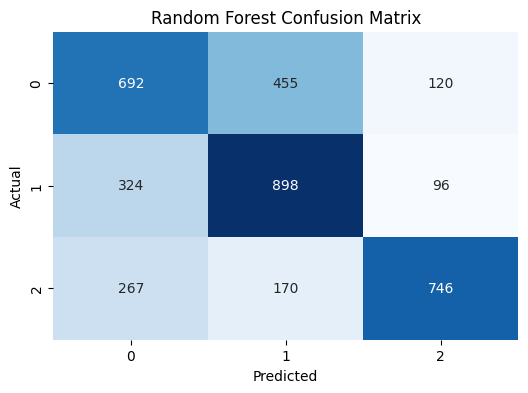

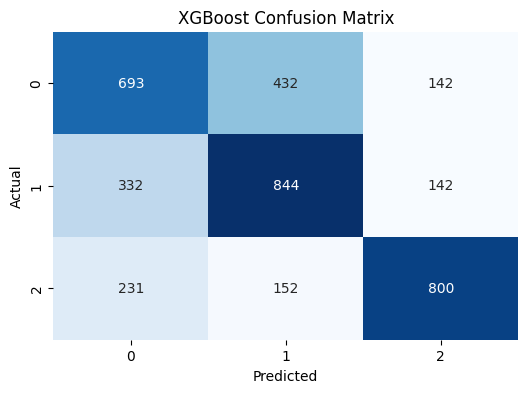

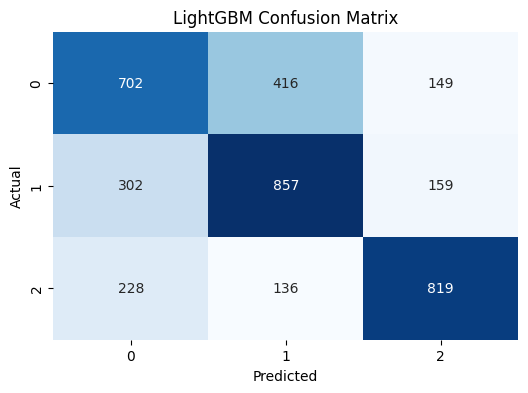

Combined Classification Report:
            precision    recall  f1-score      support          model
0           0.539361  0.546172  0.542745  1267.000000  Random Forest
1           0.589626  0.681335  0.632172  1318.000000  Random Forest
2           0.775468  0.630600  0.695571  1183.000000  Random Forest
accuracy    0.619958  0.619958  0.619958     0.619958  Random Forest
macro avg   0.634818  0.619369  0.623496  3768.000000  Random Forest
Filtered Report for Precision, Recall, and F1-Score:
   index  precision    recall  f1-score  support          model
0     0   0.539361  0.546172  0.542745   1267.0  Random Forest
1     1   0.589626  0.681335  0.632172   1318.0  Random Forest
2     0   0.551752  0.546961  0.549346   1267.0        XGBoost
3     1   0.591036  0.640364  0.614712   1318.0        XGBoost
4     0   0.569805  0.554065  0.561825   1267.0       LightGBM
Data for precision:
  index  precision          model
0     0   0.539361  Random Forest
1     1   0.589626  Random Forest

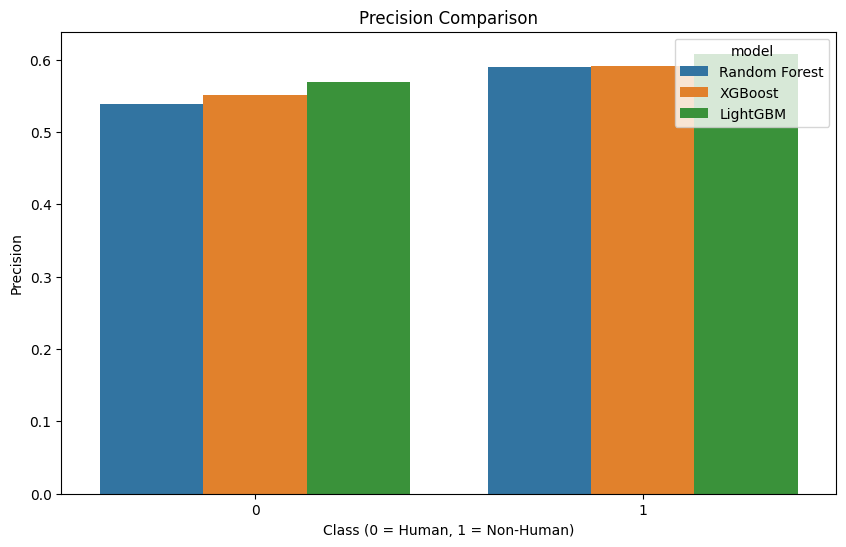

Data for recall:
  index    recall          model
0     0  0.546172  Random Forest
1     1  0.681335  Random Forest
2     0  0.546961        XGBoost
3     1  0.640364        XGBoost
4     0  0.554065       LightGBM
5     1  0.650228       LightGBM


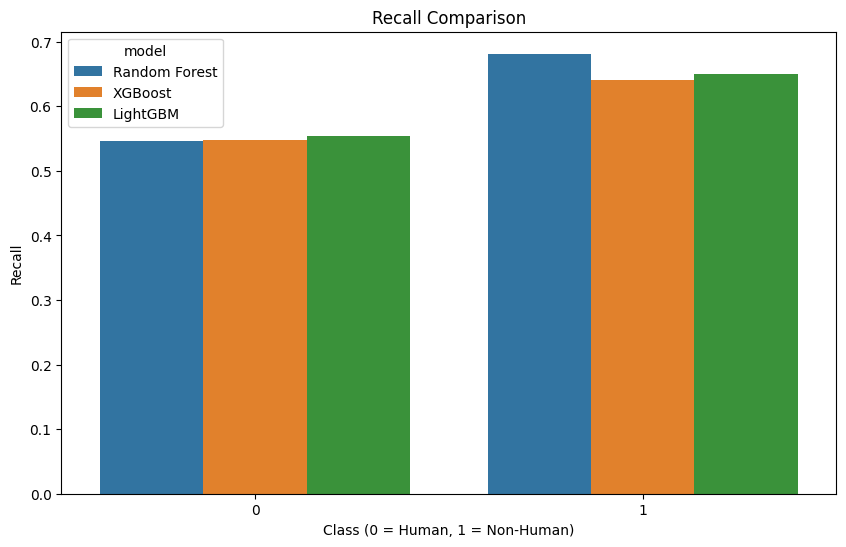

Data for f1-score:
  index  f1-score          model
0     0  0.542745  Random Forest
1     1  0.632172  Random Forest
2     0  0.549346        XGBoost
3     1  0.614712        XGBoost
4     0  0.561825       LightGBM
5     1  0.628530       LightGBM


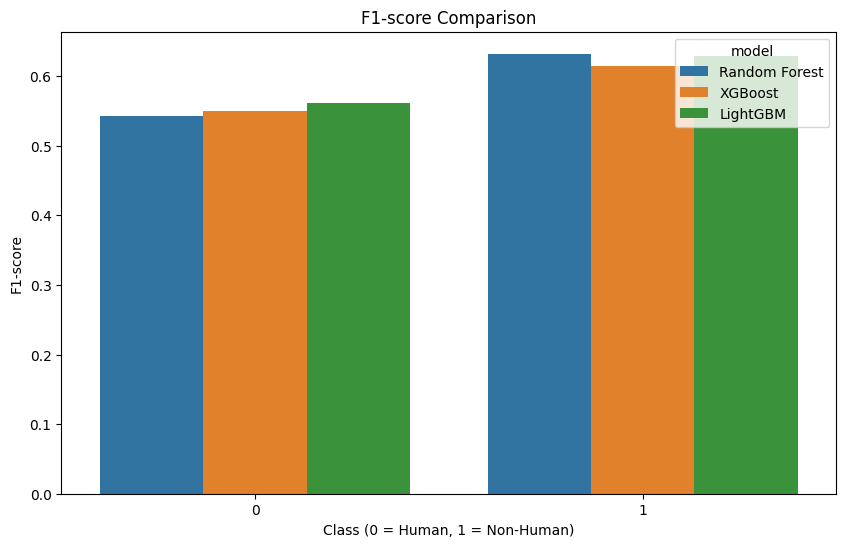

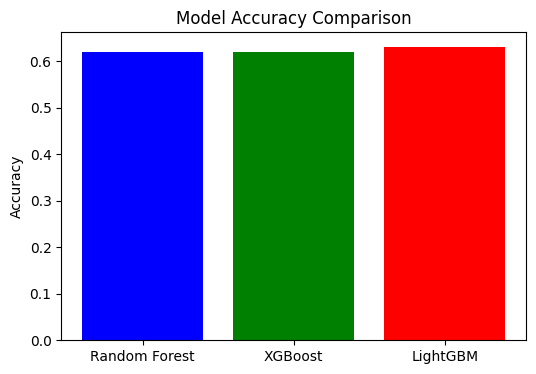

In [5]:
# Helper function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


# Helper function to extract and display classification report with model name
def get_classification_report(y_test, y_pred, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df['model'] = model_name
    return df

# Random Forest Confusion Matrix and Classification Report
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
rf_report = get_classification_report(y_test, y_pred_rf, "Random Forest")

# XGBoost Confusion Matrix and Classification Report
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
xgb_report = get_classification_report(y_test, y_pred_xgb, "XGBoost")

# LightGBM Confusion Matrix and Classification Report
plot_confusion_matrix(y_test, y_pred_lgb, "LightGBM")
lgb_report = get_classification_report(y_test, y_pred_lgb, "LightGBM")

# Combine all reports
combined_report = pd.concat([rf_report, xgb_report, lgb_report])

# Debugging Step: Check the combined report structure
print("Combined Classification Report:\n", combined_report.head())

# Filter out rows for precision, recall, and f1-score
combined_report_filtered = combined_report[
    combined_report.index.isin(['0', '1'])  # Filter for the classes
].reset_index()

# Debugging Step: Check the filtered report structure
print("Filtered Report for Precision, Recall, and F1-Score:\n", combined_report_filtered.head())

# Plot Precision, Recall, and F1-Score for each model
metrics = ['precision', 'recall', 'f1-score']

for metric in metrics:
    # Debugging Step: Filter for specific metric
    print(f"Data for {metric}:")
    print(combined_report_filtered[['index', metric, 'model']])

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="index", 
        y=metric, 
        hue="model", 
        data=combined_report_filtered[['index', metric, 'model']]
    )
    plt.title(f'{metric.capitalize()} Comparison')
    plt.ylabel(metric.capitalize())
    plt.xlabel('Class (0 = Human, 1 = Non-Human)')
    plt.show()

# Accuracy comparison
accuracies = {
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'LightGBM': accuracy_score(y_test, y_pred_lgb)
}

plt.figure(figsize=(6, 4))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 